In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [119]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [120]:
##training_images = x, training_labels=y, test_images=x_test, test_labels=y_test

In [121]:
x_train.shape

(60000, 28, 28)

In [122]:
x_test.shape

(10000, 28, 28)

In [123]:
y_train.shape

(60000,)

In [124]:
labels = ["T-Shirt", "Pantalon", "Pullover", "Robe", "Blouson", "Sandale", "Chemise",
         "Basket", "Sac", "Bottine"]

In [125]:
labels [5]

'Sandale'

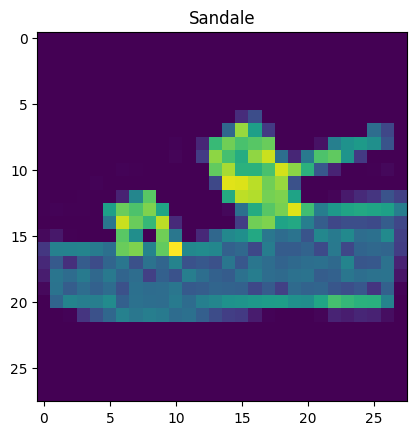

In [126]:
plt.imshow(x_train[12])
plt.title(labels[y_train[12]])
plt.show()

In [127]:
#Normalisation des données
x_train,x_test = x_train / 255.0, x_test / 255.0

In [128]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [129]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Ce code prend les étiquettes des ensembles d'entraînement et de test, et les convertit en vecteurs "one-hot encoded" de longueur 10 pour les préparer à être utilisées dans un modèle de réseau de neurones avec Keras.

Les réseaux de neurones traitent mieux les données numériques et les vecteurs. "One-hot encoding" permet de transformer les catégories en un format que les réseaux de neurones peuvent traiter efficacement.


In [130]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [131]:
y_train[12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

1er modele de classification

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [133]:
x_train.min().min(), x_train.max()

(0.0, 1.0)

Un modèle de réseau de neurones séquentiel avec deux couches denses. La première couche a 50 neurones avec activation ReLU, et la deuxième couche a 10 neurones avec activation Softmax.
Compilation : Utilise l'erreur quadratique moyenne comme perte, la descente de gradient  comme optimiseur, et suit l'exactitude comme métrique.
Entraînement : Entraîne le modèle pendant 10 époques avec des données de validation.



In [134]:
#accuracy permet de savoir le taux de bonne de classification
model = Sequential([ Dense(units=50, activation="relu"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="mse", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0798 - accuracy: 0.3686 - val_loss: 0.0704 - val_accuracy: 0.5030
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632 - accuracy: 0.5567 - val_loss: 0.0570 - val_accuracy: 0.6229
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.6439 - val_loss: 0.0497 - val_accuracy: 0.6477
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0472 - accuracy: 0.6622 - val_loss: 0.0458 - val_accuracy: 0.6654
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.6828 - val_loss: 0.0431 - val_accuracy: 0.6857
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.7065 - val_loss: 0.0411 - val_accuracy: 0.7061
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.7303 - val_loss: 0.0393 - val_accuracy:

 les résultats montrent une performance raisonnable avec une exactitude autour de 77%, mais l'utilisation de MSE comme fonction de perte pour un problème de classification n'est pas optimale. Passons à categorical_crossentropy pourrait améliorer la performance du modèle.



Remarqe :L'utilisation de loss="mse" est inhabituelle pour un problème de classification.  L'erreur quadratique moyenne est plus adaptée aux problèmes de régression.

In [ ]:
#- loss: 0.0345 - accuracy: 0.7793 - val_loss: 0.0350 - val_accuracy: 0.7713
#on a 77.93% de de reussite sur les donnees d'entrainement, sur les donnees de test on a 77.13% de reussite.
#on peut l'ameliorer en changeant de loss (la maniere de calculer l'erreur).

In [135]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 50)                39250     
                                                                 
 dense_28 (Dense)            (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Les résultats du modèle summary fournissent des informations détaillées sur l'architecture du modèle.

Layer  : Le type de couche utilisée.

Output Shape : La forme de sortie de chaque couche.

Param # : Le nombre de paramètres entraînables dans chaque couche.

Le modèle consiste en deux couches denses :

Première couche dense avec 50 neurones, activée par la fonction ReLU et ayant 39,250 paramètres.
Deuxième couche dense avec 10 neurones, activée par la fonction Softmax pour la classification, et ayant 510 paramètres.
Le total des paramètres entraînables est de 39,760, et il n'y a pas de paramètres non entraînables. Ces détails permettent de comprendre la complexité du modèle et le nombre de paramètres qui seront ajustés pendant l'entraînement.

In [136]:
def plot_loss_curve(history):


  plt.plot(list(range(len(history['loss']))), history['loss'], label = "loss")
  plt.plot(list(range(len(history['val_loss']))), history['val_loss'], label="val_loss")
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.legend(loc='upper right')
  plt.show()

def plot_accuracy_curve(history):


  plt.plot(list(range(len(history['accuracy']))), history['accuracy'], label = "accuracy")
  plt.plot(list(range(len(history['val_accuracy']))), history['val_accuracy'], label="val_accuracy")
  plt.xlabel('Epochs')
  plt.ylabel("accuracy")
  plt.title("Accuracy Curve")
  plt.legend(loc='upper right')
  plt.show()

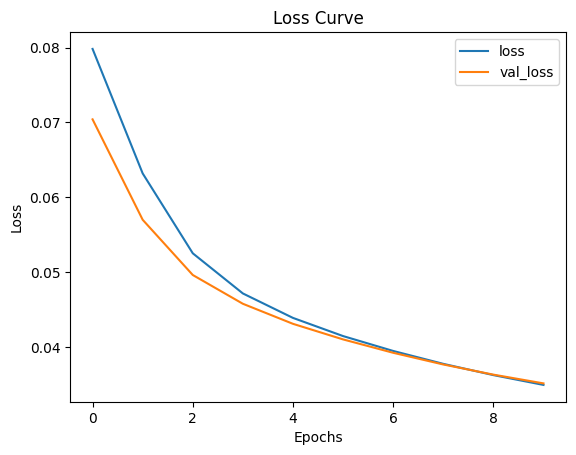

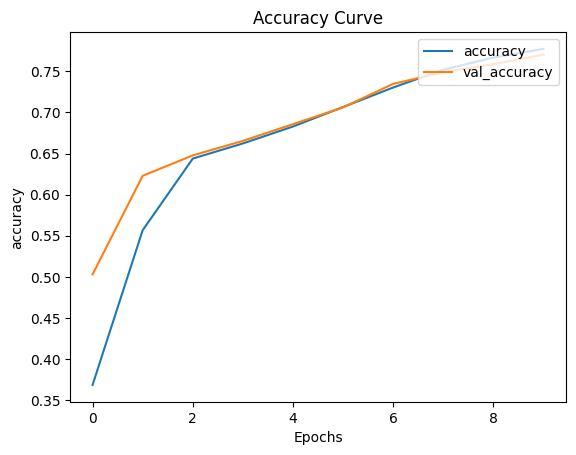

In [137]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

##2e modele avec cross entropy

Le modèle est mieux adapté pour la tâche de classification, et les performances devraient être meilleures par rapport à l'utilisation de MSE.

La sortie de la fonction sigmoïde est toujours comprise entre 0 et 1, ce qui est utile pour normaliser les sorties des neurones.

En limitant les sorties des neurones entre 0 et 1, la fonction sigmoïde aide à stabiliser l'entraînement et à maintenir les valeurs de sortie dans une plage raisonnable.

In [138]:
#entrainement avce Cross entropy
model = Sequential([ Dense(units=784, activation="sigmoid"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.1214 - accuracy: 0.6776 - val_loss: 0.7891 - val_accuracy: 0.7455
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6994 - accuracy: 0.7634 - val_loss: 0.6614 - val_accuracy: 0.7670
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6173 - accuracy: 0.7859 - val_loss: 0.6055 - val_accuracy: 0.7843
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5728 - accuracy: 0.8009 - val_loss: 0.5740 - val_accuracy: 0.7968
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5436 - accuracy: 0.8105 - val_loss: 0.5569 - val_accuracy: 0.7997
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5230 - accuracy: 0.8174 - val_loss: 0.5345 - val_accuracy: 0.8089
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5074 - accuracy: 0.8224 - val_loss: 0.5212 - val_ac

loss: 0.4773 - accuracy: 0.8327 - val_loss: 0.5021 - val_accuracy: 0.8202

Les résultats montrent que le modèle a une performance raisonnablement bonne avec une exactitude supérieure à 80% sur les ensembles d'entraînement et de validation. L'utilisation de categorical_crossentropy comme fonction de perte a amélioré la performance du modèle par rapport à l'utilisation de mse dans le premier modèle. Le modèle semble généraliser bien, avec une perte de validation légèrement supérieure à la perte d'entraînement, ce qui est un comportement attendu et souhaitable.


Remarque : Pour des réseaux plus profonds ou pour améliorer la vitesse de convergence, des alternatives comme ReLU (Rectified Linear Unit) sont souvent utilisées. ReLU ne souffre pas du problème de gradient évanescent et tend à accélérer l'apprentissage.

##3e modele de classification

Les modèles utilisant ReLU montrent une meilleure performance en termes d'exactitude et de rapidité de convergence par rapport aux modèles utilisant des fonctions d'activation sigmoïde ou tanh.

les modèles utilisant ReLU montrent une meilleure performance en termes d'exactitude et de rapidité de convergence par rapport aux modèles utilisant des fonctions d'activation sigmoïde ou tanh.

La sortie de ReLU est 0 pour les entrées négatives et égale à l'entrée pour les entrées positives.
eLU permet au modèle de converger plus rapidement pendant l'entraînement en atténuant le problème de gradient évanescent.

In [75]:
#entrainement avec Relu
model = Sequential([ Dense(units=784, activation="relu"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6969 - accuracy: 0.7766 - val_loss: 0.5625 - val_accuracy: 0.8027
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4942 - accuracy: 0.8317 - val_loss: 0.4910 - val_accuracy: 0.8307
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4529 - accuracy: 0.8444 - val_loss: 0.4743 - val_accuracy: 0.8290
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4282 - accuracy: 0.8536 - val_loss: 0.4723 - val_accuracy: 0.8320
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4110 - accuracy: 0.8574 - val_loss: 0.4437 - val_accuracy: 0.8431
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3969 - accuracy: 0.8627 - val_loss: 0.4197 - val_accuracy: 0.8522
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3854 - accuracy: 0.8663 - val_loss: 0.4133 - val_ac

loss: 0.3015 - accuracy: 0.8941 - val_loss: 0.3573 - val_accuracy: 0.8736

Le modèle utilise la fonction d'activation ReLU dans la première couche dense, ce qui permet une meilleure convergence et une performance améliorée par rapport à la fonction d'activation sigmoïde. Entraîner le modèle pendant 20 époques permet de mieux ajuster les poids, mais il est essentiel de surveiller les performances pour éviter la sur-adaptation.

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 784)               615440    
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Troisième Couche Dense

Le modèle a été modifié pour inclure une troisième couche dense avec 128 neurones et une activation ReLU.

Choisir 128 neurones dans une couche cachée est un compromis courant. Il n'est ni trop petit pour ne pas apprendre les caractéristiques nécessaires, ni trop grand pour éviter un modèle sur-complexe qui pourrait sur-adapter les données d'entraînement.

Ce nombre 128 est souvent utilisé dans la pratique car c'est une puissance de 2, ce qui peut être bénéfique en termes d'efficacité computationnelle sur certains matériels, mais cela n'a pas de conséquence directe sur les performances du modèle en termes d'apprentissage.

In [77]:
#on est passé à 3 couches
model = Sequential([ Dense(units=784, activation="relu"),
                    Dense(units=128, activation="relu"),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 0.6709 - accuracy: 0.7815 - val_loss: 0.5183 - val_accuracy: 0.8232
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4654 - accuracy: 0.8385 - val_loss: 0.4726 - val_accuracy: 0.8345
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4230 - accuracy: 0.8529 - val_loss: 0.4350 - val_accuracy: 0.8475
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3962 - accuracy: 0.8610 - val_loss: 0.4127 - val_accuracy: 0.8540
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3776 - accuracy: 0.8677 - val_loss: 0.4016 - val_accuracy: 0.8579
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3618 - accuracy: 0.8715 - val_loss: 0.3948 - val_accuracy: 0.8605
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3474 - accuracy: 0.8774 - val_loss: 0.3818 - val_ac

In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 784)               615440    
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


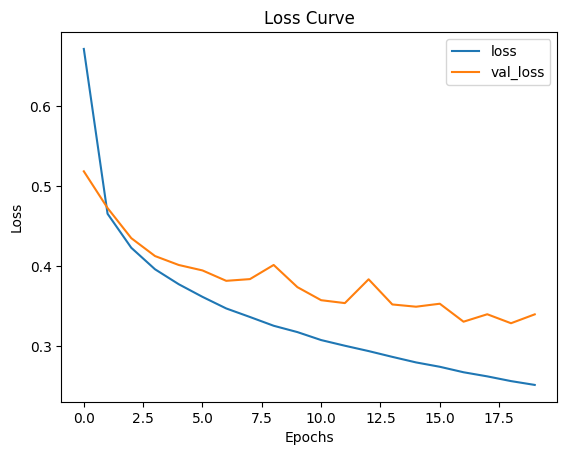

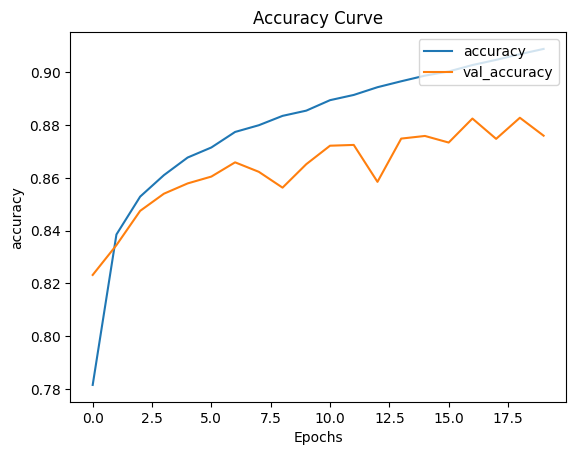

In [79]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

In [80]:
#On a un ecart qui se creuse entre le val_accuracy et Accuracy de l'entrainement, Quand on a un gros écart e ntre les donnees d'entrainement et les donnees de test.
#loss: 0.2520 - accuracy: 0.9089 - val_loss: 0.3400 - val_accuracy: 0.8760 Quand les donnees d'entrainement devient superieures on donnees de test, on a un overfitting

overfitting :

En pratique, un modèle qui overfit est souvent très facile à détecter. L’overfitting intervient lorsque l’erreur sur les données de test devient croissante. Typiquement, si l’erreur sur les données d’entraînements est beaucoup plus faible que celle sur les données de test, c’est sans doute que votre modèle a trop appris des données

##Combattre l'overfitting avec Dropout

L'une des principales utilisations du dropout est de réduire le sur-apprentissage en introduisant du bruit et de la redondance dans le modèle pendant l'entraînement. Dans le contexte de ce modèle de classification avec trois couches, le dropout être appliqué entre les couches dense pour empêcher le réseau de devenir trop dépendant de certaines activations spécifiques des neurones.

In [81]:
#Ce code crée une couche Dropout avec un taux de dropout de 0,5
#et spécifie que cette couche est la première couche du modèle
#avec une entrée bidimensionnelle de forme (2,).
dropout = tf.keras.layers.Dropout(0.5, input_shape=(2,))

In [82]:
x = np.arange(1,11).reshape(5, 2).astype(np.float32)

In [83]:
tf.keras.layers.Dropout

keras.src.layers.regularization.dropout.Dropout

In [84]:
x

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.]], dtype=float32)

Le dropout agit comme une forme de régularisation en forçant le modèle à apprendre des représentations robustes des données. En désactivant aléatoirement certains neurones pendant l'entraînement, le dropout oblige les autres neurones à prendre le relais et à apprendre des caractéristiques plus générales, ce qui peut conduire à une meilleure généralisation.

Pour appliquer le dropout à ce modèle, on peut ajouter des couches Dropout entre les couches Dense. Par exemple, on ajoute une couche Dropout avec un taux de dropout de 0,5 et un autre de 0,3 entre chaque couche Dense.Cela signifie qu'à chaque passage en avant pendant l'entraînement, chaque neurone de cette couche a une probabilité de 0.5 d'être désactivé. et 0.3 pour le suivant.

In [85]:
#combattre l'overfitting avec dropout
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8564 - accuracy: 0.7043 - val_loss: 0.5568 - val_accuracy: 0.8014
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5750 - accuracy: 0.7997 - val_loss: 0.4853 - val_accuracy: 0.8272
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5115 - accuracy: 0.8209 - val_loss: 0.4563 - val_accuracy: 0.8360
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4748 - accuracy: 0.8319 - val_loss: 0.4395 - val_accuracy: 0.8403
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4492 - accuracy: 0.8391 - val_loss: 0.4161 - val_accuracy: 0.8494
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4305 - accuracy: 0.8466 - val_loss: 0.4060 - val_accuracy: 0.8530
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4159 - accuracy: 0.8515 - val_loss: 0.3929 - val_ac

loss: 0.3271 - accuracy: 0.8827 - val_loss: 0.3410 - val_accuracy: 0.8766.

On retient qu'il n'y a pas un grand écart entre accuracy et val_accuracy. On a réduit l'overfitting

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 784)               615440    
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


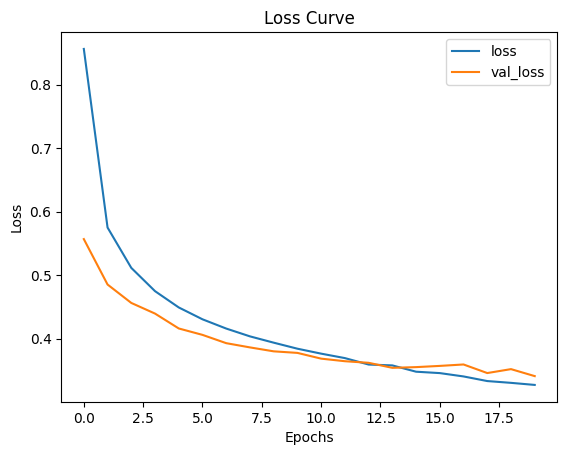

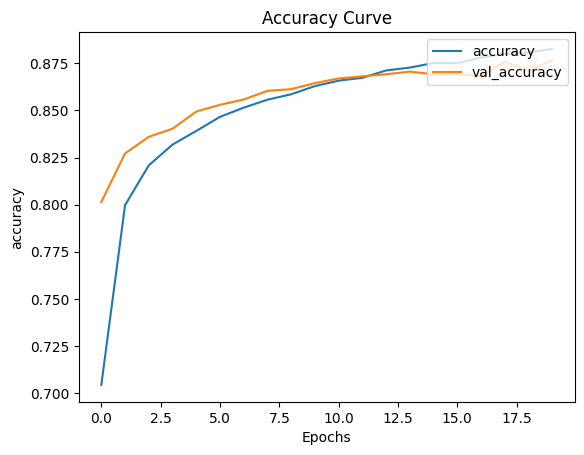

In [87]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

En désactivant aléatoirement certains neurones pendant chaque itération d'entraînement, le dropout empêche le modèle de trop dépendre de certains neurones spécifiques, ce qui rend le modèle plus robuste et généralisable.

 L'utilisation du dropout dans ce modèle de classification à aider à réduire le sur-apprentissage, à améliorer la régularisation et à rendre le modèle plus robuste. Cela conduit à des performances plus stables et généralisées lorsque le modèle est déployé dans des situations réelles.

##Collback - MethodeCheckpoint

On a vu un point qui a des meilleurs resultats. On voudrai garder le meilleur resultat, pour le faire on peut utiliser la fction callback.

Les collback sont des fctions introduit lors de l'entrainement, agissant comme un alerte qui permet de surveiller l'accuracy et sauvegarde le meilleur accuracy lors dans l'entrainement d'un model

In [88]:
#il permet de sauvegarder le meilleur moddel encours
from tensorflow.keras.callbacks import ModelCheckpoint

In [89]:
#si c'etait le loss, on allait sauvegarder le min.
#on sauvegarde le meilleur
best_model = "best_model.h7"

model_ckp = ModelCheckpoint(filepath=best_model,
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)

In [90]:
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(x_train, y_train,
              epochs=30,
              validation_data=(x_test, y_test),
              callbacks =[model_ckp])

Epoch 1/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8539 - accuracy: 0.7046 - val_loss: 0.5565 - val_accuracy: 0.8006
Epoch 2/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5762 - accuracy: 0.7996 - val_loss: 0.4815 - val_accuracy: 0.8277
Epoch 3/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5094 - accuracy: 0.8210 - val_loss: 0.4510 - val_accuracy: 0.8392
Epoch 4/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4763 - accuracy: 0.8315 - val_loss: 0.4284 - val_accuracy: 0.8466
Epoch 5/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4496 - accuracy: 0.8394 - val_loss: 0.4156 - val_accuracy: 0.8488
Epoch 6/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4317 - accuracy: 0.8467 - val_loss: 0.4080 - val_accuracy: 0.8518
Epoch 7/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4172 - accuracy: 0.8521 - val_loss: 0.3981 - val_ac

In [91]:
model_save = tf.keras.models.load_model('best_model.h7')

In [92]:
model_save.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3198 - accuracy: 0.8863


[0.31982555985450745, 0.8863000273704529]

##Early stopping

Pour arreter l'entrainement plutot, on peut mettre des conditions pour l'arreter. On peut mettre plusieurs epoch et arreter lorsque le meilleur accucracy se repete dans plusieurs Epoch

In [93]:
#Callbacks sont des fctions qu'on peut ecrire,inserer lors de l'entrainement
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)

In [94]:
model_ckp

In [95]:
model = Sequential([ Dense(units=784, activation="relu"),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                     tf.keras.layers.Dropout(0.3),
                   Dense(units=10, activation="softmax"),
                ])
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(x_train, y_train,
              epochs=1000,
              validation_data=(x_test, y_test),
              callbacks =[model_ckp, stop])

Epoch 1/1000
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8489 - accuracy: 0.7063 - val_loss: 0.5577 - val_accuracy: 0.7963
Epoch 2/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5753 - accuracy: 0.7993 - val_loss: 0.4855 - val_accuracy: 0.8262
Epoch 3/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5112 - accuracy: 0.8205 - val_loss: 0.4507 - val_accuracy: 0.8370
Epoch 4/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4754 - accuracy: 0.8316 - val_loss: 0.4276 - val_accuracy: 0.8472
Epoch 5/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4485 - accuracy: 0.8411 - val_loss: 0.4125 - val_accuracy: 0.8503
Epoch 6/1000
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4315 - accuracy: 0.8459 - val_loss: 0.4037 - val_accuracy: 0.8533
Epoch 7/1000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4164 - accuracy: 0.8519 - val_loss: 0

In [96]:
model_save = tf.keras.models.load_model('best_model.h7')

In [97]:
model_save.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 784)               615440    
                                                                 
 dropout_3 (Dropout)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


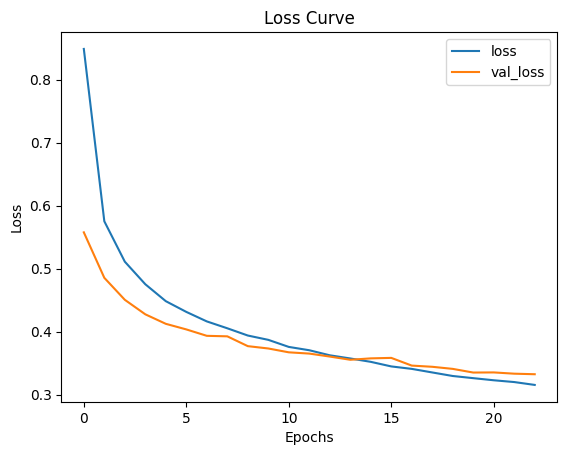

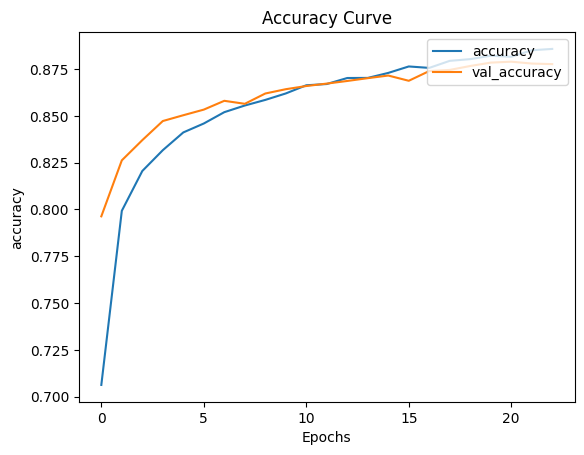

In [98]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

Fiare des prédictions

In [99]:
x_test[215].shape

(784,)

In [100]:
y_test[215]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [102]:

np.argmax(y_test[215])

3

In [103]:
labels[3]

'Robe'

In [107]:
pred = model_save.predict(x_test[215].reshape((1, 784)))

1/1 [==============================] - 0s 27ms/step


In [108]:
pred

array([[8.24965257e-03, 1.25364203e-03, 1.03761675e-04, 9.88836408e-01,
        2.30332571e-05, 7.51194057e-06, 1.19310967e-03, 7.27436145e-06,
        3.15970130e-04, 9.50459980e-06]], dtype=float32)

In [109]:
np.argmax(pred)

3

In [111]:
labels[3]

'Robe'